# 2A.eco - Web-Scraping

Sous ce nom se cache une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n'existant pas forcément sous la forme d'un tableau Excel... Bref, il s'agit de récupérer des informations depuis Internet.

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d'extraction du contenu des sites internet. Via un programme informatique : nous allons aujourd'hui vous présenter comme créer et exécuter ces robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Un détour par le Web : comment fonctionne un site ?

Même si nous n'allons pas aujourd'hui faire un cours de web, il vous faut néanmoins certaines bases pour comprendre comment un site internet fonctionne et comment sont structurées les informations sur une page.




Un site Web est un ensemble de pages codées en HTML qui permet de décrire à la fois le contenu et la forme d'une page Web.

###  HTML 


### Les balises


Sur une page web, vous trouverez toujours à coup sûr des éléments comme < head>, < title>, etc. Il  s'agit des codes qui vous permettent de structurer le contenu d'une page HTML et qui s'appellent des balises. 

Citons, par exemple, les balises < p>, < h1>, < h2>, < h3>, < strong> ou < em>.

Le symbole < > est une balise : il sert à indiquer le début d'une partie. Le symbole <\ > indique la fin de cette partie.

La plupart des balises vont par paires, avec une «balise ouvrante» et une «balise fermante». (par exemple < p> et < /p>).

#### Exemple : les balise des tableaux

$$
\begin{array}{rr} \hline
Balise  & \text{Description} \\ \hline
< table> & \text{Tableau} \\
< caption>& \text{Titre du tableau} \\
< tr> & \text{Ligne de tableau} \\
< th> & \text{Cellule d'en-tête}\\
< td> & \text{Cellule} \\
< thead> & \text{Section de l'en-tête du tableau} \\
< tbody> & \text{Section du corps du tableau} \\
< tfoot> & \text{Section du pied du tableau} \\
\end{array}
$$

##### Application : un tableau en HTML

Le code HTML du tableau suivant

Donnera dans le navigateur

|     Prénom |      Mike |   Mister |
|------------|-----------|----------|
|        Nom | Stuntman  |     Pink |
| Profession | Cascadeur | Gangster |


#### Parent et enfant

Dans le cadre du langage HTML, les termes de parents (parent) et enfants (child) servent à désigner des élements emboîtés les uns dans les autres.

Dans la construction suivante, par exemple :

On dira que l'élément < div> est le parent de l'élément < p> tandis que l'élément < p> est l'enfant de l'élément < div>.

----------

Mais pourquoi apprendre ça pour scraper me direz-vous ?

Pour bien récupérer les informations d'un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions python qui servent au scrapping sont principalement construites pour vous permettre de naviguer entre les balises

### Optionnel - CSS - le style de la page WEB

Quand le bout de code html est écrit, il apaprait sous la forme d'un texte noir sur un fond blanc. Une manière simple de rendre la page plus belle, c'est d'y ajouter de la couleur. 

La feuille de style qui permet de rendre la page plus belle correspond au(x) fichier(s) CSS. 

Toutes les pages HTML qui font référence à cette feuille de style externe hériteront de toutes ses définitions.

Nous y reviendrons plus en détail dans le TD sur Flask (module Python de création de site internet).

## Scrapper avec python

Nous allons essentiellement utiliser le package BeautifulSoup4 pour ce cours, mais d'autres packages existent (Selenium, Scrapy...).

BeautifulSoup sera suffisant quand vous voudrez travailler sur des pages HTML statiques, dès que les informations que vous recherchez sont générées via l'exécution de scripts Javascipt, il vous faudra passer par des outils comme Selenium.

De même, si vous ne connaissez pas l'URL, il faudra passer par un framework comme Scrapy, qui passe facilement d'une page à une autre ("crawl"). Scrapy est plus complexe à manipuler que BeautifulSoup : si vous voulez plus de détails, rendez-vous sur la page du tutorial https://doc.scrapy.org/en/latest/intro/tutorial.html.

### Utiliser BeautifulSoup

Les packages pour scrapper des pages HTML : 
- BeautifulSoup (pip install bs4)
- urllib 

In [2]:
import urllib
import bs4
#help(bs4)

##### 1ere page HTML

On va commencer facilement, prenons une page wikipedia, par exemple celle de la Ligue 1 de football :

https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2016-2017

On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.

In [3]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2016-2017"
    
from urllib import request

request_text = request.urlopen(url_ligue_1).read()
print(request_text[:1000])    

b'<!DOCTYPE html>\n<html class="client-nojs" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Championnat de France de football 2016-2017 \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Championnat_de_France_de_football_2016-2017","wgTitle":"Championnat de France de football 2016-2017","wgCurRevisionId":151793229,"wgRevisionId":151793229,"wgArticleId":9734718,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Page utilisant une frise chronologique","Article avec une section vide ou incompl\xc3\xa8te","Article avec section \xc3\xa0 d\xc3\xa9lister","Article \xc3\xa0 d\xc3\xa9lister","Portail:Football/Articles li\xc3

In [4]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

#print(page)

Si on print l'objet, page créée avec BeautifulSoup, on voit que ce n'est plus une chaine de caractères mais bien une page HTML avec des balises. On peut à présenter chercher des élements à l'intérieur de ces balises.


par exemple, si on veut connaire le titre de la page, on utilise la méthode .find et on lui demande "title"

In [5]:
print(page.find("title"))

<title>Championnat de France de football 2016-2017 — Wikipédia</title>


la methode .find ne renvoie que la première occurence de l'élément

In [6]:
print(page.find("table"))

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Soixante-dix-neuvième (septante-neuvième)">79<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset

---------------
Pour trouver toutes les occurences, on utilise .findAll()

In [7]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

Il y a 32 éléments dans la page qui sont des <table>


In [8]:
print(" Le 2eme tableau de la page : Hiérarchie \n", page.findAll("table")[1])
print("--------------------------------------------------------")
print("Le 3eme tableau de la page : Palmarès \n",page.findAll("table")[2])

 Le 2eme tableau de la page : Hiérarchie 
 <table><caption style="background:#99cc99;color:#000000;">Hiérarchie</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Hiérarchie</th>
<td>
<abbr class="abbr" title="Premier">1<sup>er</sup></abbr> échelon</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Niveau inférieur</th>
<td>
<a href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2016-2017" title="Championnat de France de football de Ligue 2 2016-2017">Ligue 2 2016-2017</a></td>
</tr></tbody></table>
--------------------------------------------------------
Le 3eme tableau de la page : Palmarès 
 <table><caption style="background:#99cc99;color:#000000;">Palmarès</caption>
<tbody><tr>
<th scope="row" style="width:10.5em;">Tenant du titre</th>
<td>
<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a> (6)</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Promu(s) en début de saison</th>
<td>
<a class="mw-redi

### Exercice guidé : obtenir la liste des équipes de Ligue 1

La liste des équipes est dans le tableau "Participants" : dans le code source, on voit que ce tableau est celui qui a class = "DebutCarte" 

On voit également que les balises qui encerclent les noms et les urls des clubs sont de la forme suivante

```
<a href="url_club" title="nom_club"> Nom du club </a>
```

In [9]:
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    print(item, "\n-------")

<a class="image" href="/wiki/Fichier:France_location_map-Regions-2016.svg"><img alt="France location map-Regions-2016.svg" data-file-height="1922" data-file-width="2000" height="288" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/300px-France_location_map-Regions-2016.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/450px-France_location_map-Regions-2016.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/600px-France_location_map-Regions-2016.svg.png 2x" width="300"/></a> 
-------
<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a> 
-------
<a href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco FC</a> 
-------
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a> 
-------
<a href="/

On n'a pas envie de prendre le premier élément qui ne correspond pas à un club mais à une image.

Or cet élément est le seul qui n'ait pas de title = "". 

Il est conseillé d'exclure les élements qui ne nous intéressent pas en indiquant les éléments que la ligne doit avoir au lieu de les exclure en fonction de leur place dans la liste

In [10]:
### condition sur la place dans la liste >>>> MAUVAIS
for e, item in enumerate(page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5]) : 
    if  e == 0: 
        pass
    else : 
        print(item)

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a>
<a href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco FC</a>
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>
<a href="/wiki/Stade_rennais_football_club" title="Stade rennais football club">Stade rennais FC</a>


In [11]:
#### condition sur les éléments que doit avoir la ligne >>>> BIEN 
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item)

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a>
<a href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco FC</a>
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>
<a href="/wiki/Stade_rennais_football_club" title="Stade rennais football club">Stade rennais FC</a>


Enfin la dernière étape, consiste à obtenir les informations souhaitées, c'est à dire dans notre cas, le nom et l'url des 20 clubs. 

Pour cela, nous allons utiliser deux méthodes de l'élement item : 
- getText() qui permet d'obtenir le texte qui est sur la page web et dans la balise  < a>
- get('xxxx') qui permet d'obtenir l'élément qui est égal à xxxx

Dans notre cas, nous allons vouloir le nom du club ainsi que l'url : on va donc utiliser __getText__ et __get("href")__

In [12]:
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item.get("href"))
        print(item.getText())

/wiki/Paris_Saint-Germain_Football_Club
Paris SG
/wiki/Association_sportive_de_Monaco_football_club
AS Monaco FC
/wiki/Olympique_lyonnais
Olympique lyonnais
/wiki/Stade_rennais_football_club
Stade rennais FC


In [13]:
# pour avoir le nom officiel, on aurait utiliser l'élément <title>
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item.get("title"))

Paris Saint-Germain Football Club
Association sportive de Monaco football club
Olympique lyonnais
Stade rennais football club


Toutes ces informations, on souhaite les conserver dans un tableau Excel pour pouvoir les réuitiliser à l'envie : pour cela, rien de plus simple, on va passer par pandas, parce qu'on le maitrise parfaitement à ce stade de la formation.

In [14]:
import pandas

liste_noms = []
liste_urls = []

for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'}) : 
    if item.get("title") :
        liste_urls.append(item.get("href"))
        liste_noms.append(item.getText())
        
df = pandas.DataFrame.from_dict( {"clubs" : liste_noms, 'url' : liste_urls})

In [15]:
df.head()

,clubs,url
0,Paris SG,/wiki/Paris_Saint-Germain_Football_Club
1,AS Monaco FC,/wiki/Association_sportive_de_Monaco_football_...
2,Olympique lyonnais,/wiki/Olympique_lyonnais
3,Stade rennais FC,/wiki/Stade_rennais_football_club
4,OGC Nice,/wiki/Olympique_gymnaste_club_Nice_C%C3%B4te_d...


### Exercice de web scraping avec BeautifulSoup

Pour cet exercice, nous vous demandons d'obtenir 1) les informations personnelles des 721 pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national)

Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :
- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple :  http://pokemondb.net/pokedex/nincada

2) Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  (indice : utilisez les modules request et shutil)
_pour cette question ci, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_

### Aller sur internet avec Selenium

L'avantage du package [Selenium](https://pypi.python.org/pypi/selenium) est d'obtenir des informations du site qui ne sont pas dans le code html mais qui apparaissent uniquement à la suite de l'exécution de script javascript en arrière plan. [Selenium](https://pypi.python.org/pypi/selenium) se comporte comme un utilisateur qui surfe sur internet : il clique sur des liens, il remplit des formulaires etc. Dans cet exemple, nous allons essayer de aller sur le site de [Bing Actualités](https://www.bing.com/news) et entrer dans la barre de recherche un sujet donné. La version de [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/) doit être ``>= 2.36``.

In [16]:
# Si selenium n'est pas installé.
# !pip install selenium

In [17]:
import selenium #pip install selenium
# télécharger le chrome driver https://chromedriver.storage.googleapis.com/index.html?path=2.42/
path_to_web_driver = "./chromedriver"

In [18]:
import os, sys
from pyquickhelper.filehelper import download, unzip_files
if "win" in sys.platform:
    if not os.path.exists("chromedriver_win32.zip"):
        d = download("http://chromedriver.storage.googleapis.com/2.37/chromedriver_win32.zip")
    if not os.path.exists("chromedriver.exe"):
        unzip_files("chromedriver_win32.zip", where_to=".")
elif sys.platform.startswith("linux"):
    if not os.path.exists("chromedriver_linux64.zip"):
        d = download("http://chromedriver.storage.googleapis.com/2.37/chromedriver_linux64.zip")
    if not os.path.exists("chromedriver"):
        unzip_files("chromedriver_linux64.zip", where_to=".")
elif sys.platform.startswith("darwin"):
    if not os.path.exists("chromedriver_mac64.zip"):
        d = download("http://chromedriver.storage.googleapis.com/2.37/chromedriver_mac64.zip")
    if not os.path.exists("chromedriver"):
        unzip_files("chromedriver_mac64.zip", where_to=".")        

On soumet la requête.

In [19]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

browser = webdriver.Chrome(path_to_web_driver)
browser.get('https://www.bing.com/news')

# on cherche l'endroit où on peut remplir un formulaire
# en utilisant les outils du navigateur > inspecter les éléments de la page
# on voit que la barre de recherche est un élement du code appelé 'q' comme query
# on lui demande de chercher cet élément
search = browser.find_element_by_name('q')
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("alstom")

search_button = browser.find_element_by_xpath("//input[@id='sb_form_go']")

#search_button = browser.find_element_by_id('search_button_homepage')
 
search_button.click()

# on appuie sur le bouton "Entrée" Return en anglais
#search.send_keys(Keys.RETURN)

<selenium.webdriver.remote.webelement.WebElement (session="ca2e361c5fd8be355dc45b5541e5308d", element="0.18439074135287514-1")>
['', 'input', '0.18439074135287514-1']


In [20]:
png = browser.get_screenshot_as_png()

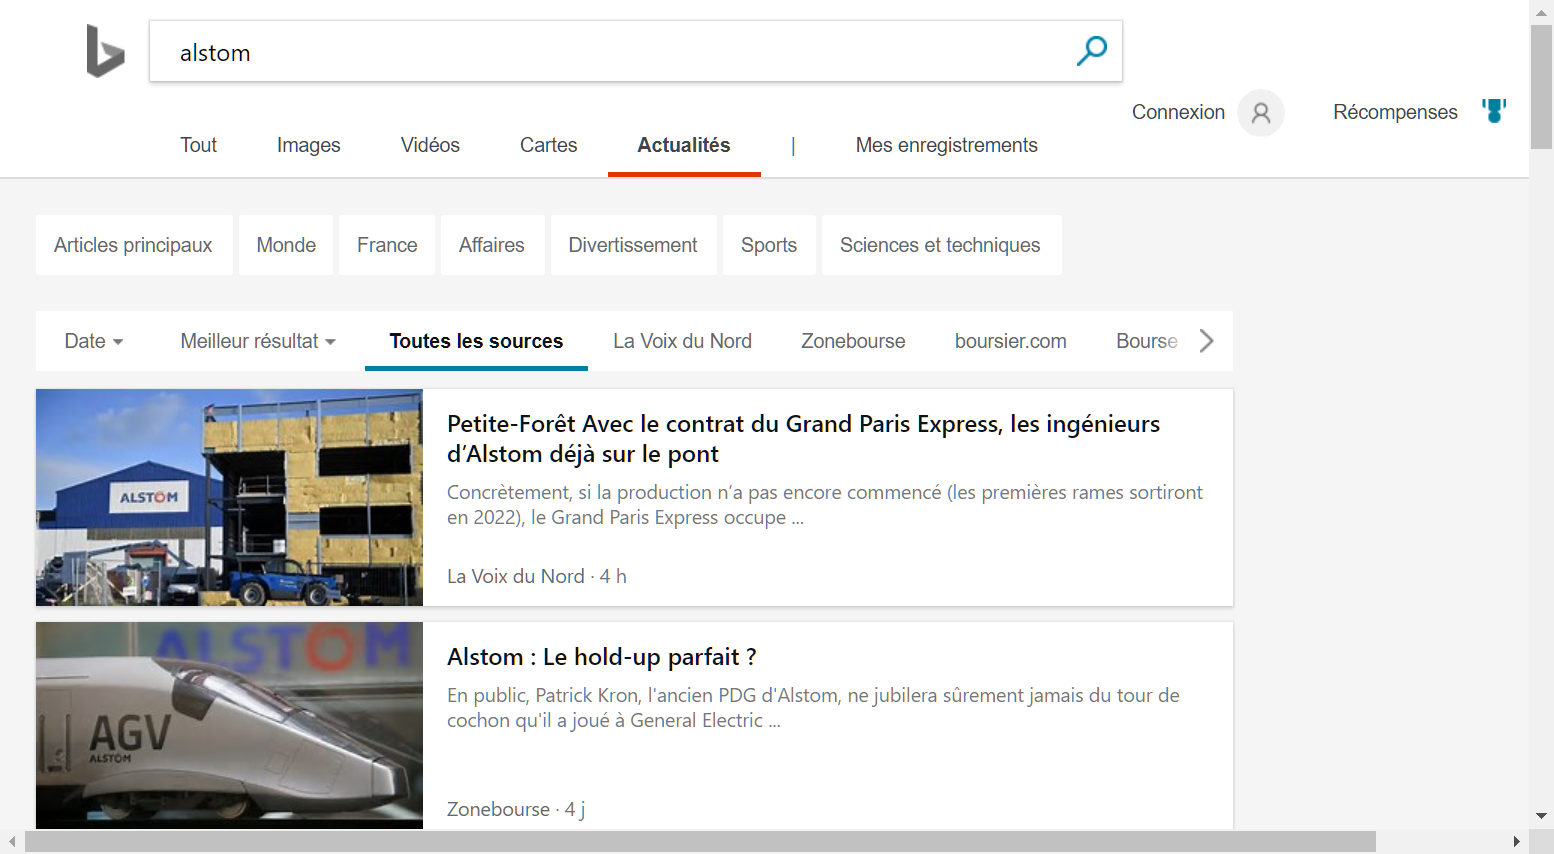

In [21]:
from IPython.display import Image
Image(png, width='500')

On extrait les résultats.

In [22]:
from selenium.common.exceptions import StaleElementReferenceException
links = browser.find_elements_by_xpath("//div/a[@class='title'][@href]")

results = []
for link in links:
    try:
        url = link.get_attribute('href')
    except StaleElementReferenceException as e:
        print("Issue with '{0}' and '{1}'".format(url, link))
        print("It might be due to slow javascript which produces the HTML page.")
    results.append(url)

len(results)

20

In [23]:
# on a une pause de 10 secondes pour aller voir ce qui se passe sur la page internet
# on demande de quitter le navigateur quand tout est fini
browser.quit()

In [24]:
print(results)

['http://www.lavoixdunord.fr/463904/article/2018-10-07/avec-le-contrat-du-grand-paris-express-les-ingenieurs-d-alstom-deja-sur-le-pont', 'https://www.zonebourse.com/ALSTOM-4607/actualite/Alstom-Le-hold-up-parfait--27362814/', 'https://www.boursier.com/actions/actualites/news/barclays-apprecie-alstom-et-legrand-776743.html', 'https://www.boursedirect.fr/fr/actualites/categorie/entreprises/alstom-sa-alstom-realise-la-cession-a-general-electric-de-toutes-ses-participations-dans-les-trois-co-entreprises-en-globenewswire-2acf05a1175cd1d914b9dd33c520a4ef765fd3ed', 'https://www.lemonde.fr/economie/article/2018/10/02/les-deboires-de-general-electric-inquietent-les-ex-alstom_5363533_3234.html', 'https://investir.lesechos.fr/actions/actualites/alstom-boucle-ses-cessions-a-ge-et-confirme-un-dividende-exceptionnel-de-4-euros-1795689.php', 'http://www.lavoixdunord.fr/460935/article/2018-10-02/et-voici-chez-alstom-le-reveil-musculaire-avant-le-boulot', 'https://www.boursedirect.fr/fr/actualites/cate

### Obtenir des informations entre deux dates sur Google News

En réalité, l'exemple de Google News aurait pu se passer de Selenium et être utilisé directement avec BeautifulSoup et les url qu'on réussit à deviner de Google. 

Ici, on utilise l'url de Google News pour créer une petite fonction qui donne pour chaque ensemble de (sujet, debut d'une période, fin d'une période) des liens pertinents issus de la recherche Google.

In [25]:
import time
from selenium import webdriver


def get_news_specific_dates (beg_date, end_date, subject, hl="fr",
                             gl="fr", tbm="nws", authuser="0") :
    '''
    Permet d obtenir pour une requete donnée et un intervalle temporel
    précis les 10 premiers résultats 
    d articles de presse parus sur le sujet
    '''
    get_string = 'https://www.google.com/search?hl={}&gl={}&tbm={}&authuser={}&q={}&tbs=cdr%3A1%2Ccd_min%3A{}%2Ccd_max%3A{}&tbm={}'.format(
                                    hl, gl, tbm, authuser, subject, beg_date, end_date,tbm)
    print(get_string)
    browser.get(get_string)
    
    # La class peut changer si Google met à jour le style de sa page.
    # Cela arrive régulièrement. Dans ce cas, il faut utiliser des
    # outils de débuggage web (Chrome - Outils de développement)
    # links = browser.find_elements_by_xpath("//h3[@class='r dO0Ag']/a[@href]")
    links = browser.find_elements_by_xpath("//h3/a[@href]")
    print(len(links))

    results = []
    for link in links:
        url = link.get_attribute('href')
        results.append(url)
    browser.quit()    
    return results

On appelle la fonction créée à l'instant.

In [26]:
browser = webdriver.Chrome(path_to_web_driver)
articles = get_news_specific_dates("3/15/2018", "3/31/2018", "alstom", hl="fr")

https://www.google.com/search?hl=fr&gl=fr&tbm=nws&authuser=0&q=alstom&tbs=cdr%3A1%2Ccd_min%3A3/15/2018%2Ccd_max%3A3/31/2018&tbm=nws
10


In [27]:
print(articles)

['http://www.europe1.fr/economie/letat-va-commander-100-tgv-du-futur-a-alstom-3606569', 'https://www.usinenouvelle.com/article/alstom-fournira-54-trains-regionaux-en-italie-pour-330-millions-d-euros.N671144', 'https://www.boursier.com/actions/actualites/news/alstom-inauguration-en-algerie-760229.html', 'https://www.lemonde.fr/alstom/article/2018/03/23/transport-ferroviaire-alstom-et-siemens-signent-leur-accord-de-rapprochement_5275705_4998264.html', 'https://investir.lesechos.fr/actions/actualites/alstom-recoit-deux-commandes-de-trains-regionaux-en-allemagne-pour-116-mlns-d-euros-1753094.php', 'https://www.ouest-france.fr/economie/transports/transport-le-futur-tramway-d-alstom-se-recharge-chaque-station-5631169', 'https://france3-regions.francetvinfo.fr/nouvelle-aquitaine/charente-maritime/la-rochelle/alstom-souhaite-gommer-cliches-role-femmes-industrie-1448965.html', 'http://lcp.fr/la-politique-en-video/affaire-alstom-clara-gaymard-revient-sur-les-coulisses-du-rachat-par-general', 'ht

### Utiliser selenium pour jouer à 2048

Dans cet exemple, on utilise le module pour que python appuie lui même sur les touches du clavier afin de jouer à 2048.

Note : ce bout de code ne donne pas une solution à 2048, il permet juste de voir ce qu'on peut faire avec selenium

In [28]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# on ouvre la page internet du jeu 2048

browser = webdriver.Chrome(path_to_web_driver)
browser.get('https://gabrielecirulli.github.io/2048/')

# Ce qu'on va faire : une boucle qui répète inlassablement la même chose : haut / droite / bas / gauche

# on commence par cliquer sur la page pour que les touches sachent 
browser.find_element_by_class_name('grid-container').click()
grid = browser.find_element_by_tag_name('body')

# pour savoir quels coups faire à quel moment, on crée un dictionnaire
direction = {0: Keys.UP, 1: Keys.RIGHT, 2: Keys.DOWN, 3: Keys.LEFT}
count = 0

while True:
    try: # on vérifie que le bouton "Try again" n'est pas là - sinon ça veut dire que le jeu est fini
        retryButton = browser.find_element_by_link_text('Try again')
        scoreElem = browser.find_element_by_class_name('score-container')
        break
    except:
        #Do nothing.  Game is not over yet
        pass
    # on continue le jeu - on appuie sur la touche suivante pour le coup d'après
    count += 1
    grid.send_keys(direction[count % 4]) 
    time.sleep(0.1)

print('Score final : {} en {} coups'.format(scoreElem.text, count))    
browser.quit()

Score final : 2048 en 178 coups
